In [1]:
# Download data command: `python download_data.py --project=feature_recycling-rupam_task_pruning_methods-final_hypers`

In [2]:
# TODO:
# - x-axis: hidden-dim, y-axis: final loss, color code by sweep size, and show how only
#   feature replacement lets go beyond a certain bound, and how more features scales
# - For prediction network of each size, plot a line with replacement-rate on x-axis, and
#   loss on y-axis to show that 0.005 was the best for all sizes  

In [3]:
import sys

sys.path.append('../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from plotting_utils import *

sns.set_theme('notebook', 'white')
%matplotlib inline

In [16]:
config_data_path = 'data/config_data.csv'
run_data_path = f'data/run_data.csv'
save_path = 'figures/'

raw_config_df = pd.read_csv(config_data_path, index_col=0)
raw_config_df['run_id'] = raw_config_df['id']
raw_run_df = pd.read_csv(run_data_path, index_col=0)

replacement_config_data_path = 'data/replacement_rate_config_data.csv'
replacement_run_data_path = f'data/replacement_rate_run_data.csv'

raw_replacement_config_df = pd.read_csv(replacement_config_data_path, index_col=0)
raw_replacement_config_df['run_id'] = raw_replacement_config_df['id']
raw_replacement_run_df = pd.read_csv(replacement_run_data_path, index_col=0)

# print('Config data:')
# print(raw_config_df.columns)
# display(raw_config_df.head())
# print('Run data:')
# print(raw_run_df.columns)
# display(raw_run_df.head())


In [18]:
# Function to flatten nested dictionaries with dot notation
def flatten_dict(d, parent_key='', sep='.'):
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

# Process each row for both config dataframes
def flatten_config_df(df):
    flattened_rows = []
    for _, row in df.iterrows():
        flat_row = {}
        for col, val in row.items():
            if isinstance(val, str) and val.startswith('{'):
                try:
                    # Try to evaluate string as dict
                    dict_val = eval(val)
                    if isinstance(dict_val, dict):
                        flat_row.update(flatten_dict(dict_val, parent_key=col))
                    else:
                        flat_row[col] = val
                except:
                    flat_row[col] = val
            else:
                flat_row[col] = val
        flattened_rows.append(flat_row)
    return pd.DataFrame(flattened_rows)

# Create new dataframes with flattened structure
flat_config_df = flatten_config_df(raw_config_df)
flat_replacement_config_df = flatten_config_df(raw_replacement_config_df)

display(flat_config_df.head())
display(flat_replacement_config_df.head())

,name,id,sweep,idbd.version,idbd.autostep,idbd.meta_learning_rate,seed,task.name,task.type,task.n_layers,...,input_recycling.utility_decay,input_recycling.use_cbp_utility,input_recycling.distractor_chance,input_recycling.n_start_real_features,input_recycling.feature_protection_steps,feature_recycling.recycle_rate,feature_recycling.utility_decay,feature_recycling.use_cbp_utility,feature_recycling.feature_protection_steps,run_id
0,soft-sweep-2,kdaqzjx2,k37sz3cm,squared_grads,True,0.01,5,nonlinear_geoff,regression,2,...,0.99,False,0,-1,100,0.0,0.99,False,0,kdaqzjx2
1,sunny-sweep-1,zvdvbpxb,k37sz3cm,squared_grads,True,0.01,4,nonlinear_geoff,regression,2,...,0.99,False,0,-1,100,0.0,0.99,False,0,zvdvbpxb
2,mild-sweep-3,8ucv64pk,k37sz3cm,squared_grads,True,0.01,6,nonlinear_geoff,regression,2,...,0.99,False,0,-1,100,0.0,0.99,False,0,8ucv64pk
3,mild-sweep-4,e8xr8wb0,k37sz3cm,squared_grads,True,0.01,7,nonlinear_geoff,regression,2,...,0.99,False,0,-1,100,0.0,0.99,False,0,e8xr8wb0
4,wild-sweep-5,580mqvpa,k37sz3cm,squared_grads,True,0.01,8,nonlinear_geoff,regression,2,...,0.99,False,0,-1,100,0.0,0.99,False,0,580mqvpa


,name,id,sweep,idbd.version,idbd.autostep,idbd.meta_learning_rate,seed,task.name,task.type,task.n_layers,...,input_recycling.utility_decay,input_recycling.use_cbp_utility,input_recycling.distractor_chance,input_recycling.n_start_real_features,input_recycling.feature_protection_steps,feature_recycling.recycle_rate,feature_recycling.utility_decay,feature_recycling.use_cbp_utility,feature_recycling.feature_protection_steps,run_id
0,trim-sweep-60,61ejd2vb,gqy3yoq6,squared_grads,True,0.005,3,nonlinear_geoff,regression,2,...,0.99,False,0,-1,100,0.005,0.99,True,500,61ejd2vb
1,honest-sweep-59,7gb0b0ny,gqy3yoq6,squared_grads,True,0.005,2,nonlinear_geoff,regression,2,...,0.99,False,0,-1,100,0.005,0.99,True,500,7gb0b0ny
2,faithful-sweep-58,qptzaene,gqy3yoq6,squared_grads,True,0.005,3,nonlinear_geoff,regression,2,...,0.99,False,0,-1,100,0.005,0.99,True,500,qptzaene
3,crisp-sweep-57,ir42oko6,gqy3yoq6,squared_grads,True,0.005,2,nonlinear_geoff,regression,2,...,0.99,False,0,-1,100,0.005,0.99,True,500,ir42oko6
4,deep-sweep-56,qyzdfe9f,gqy3yoq6,squared_grads,True,0.005,3,nonlinear_geoff,regression,2,...,0.99,False,0,-1,100,0.005,0.99,True,500,qyzdfe9f


## Performance as a function of model size

In [20]:
final_step_df = raw_run_df.sort_values('step').groupby('run_id').last().reset_index()
final_phase_df = raw_run_df.sort_values('step').groupby('run_id').tail(50).groupby('run_id').mean().reset_index()
avg_df = raw_run_df.groupby('run_id').mean().reset_index()

# Join final step data with config data on run_id
final_step_df = final_step_df.merge(flat_config_df, on='run_id', how='left')
final_phase_df = final_phase_df.merge(flat_config_df, on='run_id', how='left')
avg_df = avg_df.merge(flat_config_df, on='run_id', how='left')

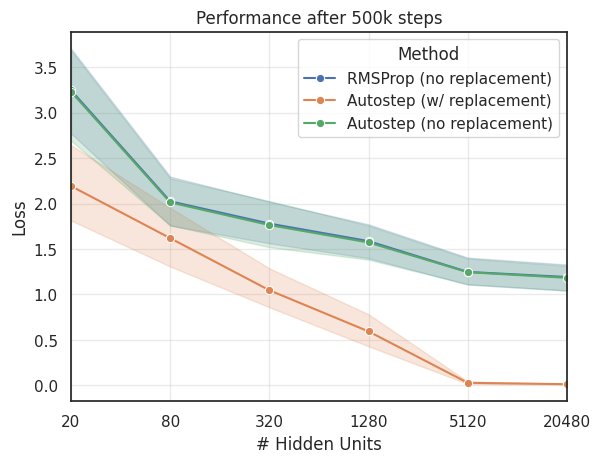

In [21]:
# Create mapping dictionary for sweep names
sweep_map = {
    'k37sz3cm': 'RMSProp (no replacement)',
    'dsngi5d4': 'Autostep (no replacement)', 
    '2w0np0pd': 'Autostep (w/ replacement)'
}

# Create copy of dataframe for plotting
plot_df = final_phase_df.copy()

# Replace sweep values with new names
plot_df['sweep'] = plot_df['sweep'].map(sweep_map)

# Create plot
sns.lineplot(
    data=plot_df,
    x='model.hidden_dim',
    y='loss',
    hue='sweep',
    marker='o',
    palette='deep'
)

# Get unique x values and sort them
x_ticks = sorted(plot_df['model.hidden_dim'].unique())

# Customize plot
plt.grid(True, alpha=0.4)  # Add light grid
plt.xlim(plot_df['model.hidden_dim'].min(), plot_df['model.hidden_dim'].max())
plt.xscale('log')
plt.xticks(x_ticks, x_ticks)
plt.title('Performance after 500k steps')
plt.xlabel('# Hidden Units')
plt.ylabel('Loss')
plt.legend(title='Method')

In [ ]:
# - For prediction network of each size, plot a line with replacement-rate on x-axis, and
#   loss on y-axis to show that 0.005 was the best for all sizes  

## Performance as a function of replacement rate

In [23]:
final_rep_step_df = raw_replacement_run_df.sort_values('step').groupby('run_id').last().reset_index()
final_rep_phase_df = raw_replacement_run_df.sort_values('step').groupby('run_id').tail(50).groupby('run_id').mean().reset_index()
avg_rep_df = raw_replacement_run_df.groupby('run_id').mean().reset_index()

# Join final step data with config data on run_id
final_rep_step_df = final_rep_step_df.merge(flat_replacement_config_df, on='run_id', how='left')
final_rep_phase_df = final_rep_phase_df.merge(flat_replacement_config_df, on='run_id', how='left')
avg_rep_df = avg_rep_df.merge(flat_replacement_config_df, on='run_id', how='left')

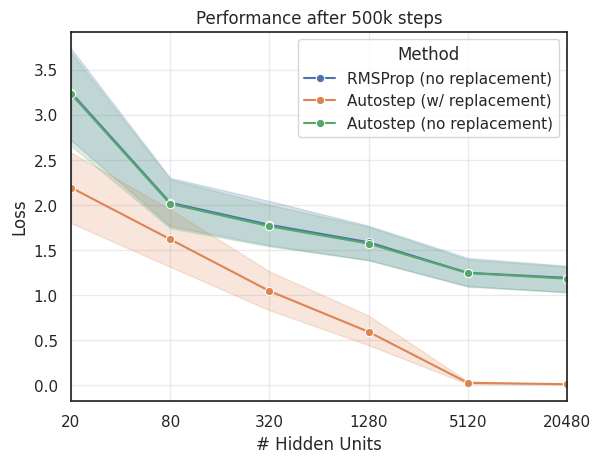

In [22]:
# Create copy of dataframe for plotting
plot_df = final_rep_phase_df.copy()

# Create plot
sns.lineplot(
    data=plot_df,
    x='model.hidden_dim',
    y='loss',
    hue='sweep',
    marker='o',
    palette='deep'
)

# Get unique x values and sort them
x_ticks = sorted(plot_df['model.hidden_dim'].unique())

# Customize plot
plt.grid(True, alpha=0.4)  # Add light grid
plt.xlim(plot_df['model.hidden_dim'].min(), plot_df['model.hidden_dim'].max())
plt.xscale('log')
plt.xticks(x_ticks, x_ticks)
plt.title('Performance after 500k steps')
plt.xlabel('# Hidden Units')
plt.ylabel('Loss')
plt.legend(title='Method')